In [1]:
import bainite_boundaries

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import seaborn as sns
import pandas as pd

path=str(bainite_boundaries.PROJECT_ROOT)+'/bainite_boundaries/data/'
results_path=str(bainite_boundaries.PROJECT_ROOT)+'/bainite_boundaries/bainite_boundaries/results/'

import os 
from pathlib import Path
import sys
project_root = os.path.abspath(Path(str(bainite_boundaries.PROJECT_ROOT), 'bainite_boundaries', 'bainite_boundaries'))

# Add `bainite_boundaries` to sys.path if it’s not already present
if project_root not in sys.path:
    sys.path.insert(0, project_root)
    

palette = sns.color_palette("deep")
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=palette)
sns.set_context("notebook")
sns.set_style('whitegrid')
# Remove the top and right spines
#sns.despine()

# Optional: Customize gridlines
#plt.grid(True, which='major', linestyle='-', linewidth='0.5', color='gray')
#plt.grid(True, which='minor', linestyle=':', linewidth='0.5', color='gray')
norm = mcolors.Normalize(vmin=0, vmax=1)

In [2]:
if False:
    nbins=8
    #Load example data
    data=np.loadtxt(path+'Austenite_input2.txt')
    y=np.loadtxt(path+'Austenite_y2.txt')

    L=y==1
    L1=y==-1
    print(np.sum(L1))

    L2=y==-2
    print(np.sum(L2))

In [3]:


filename = f'{results_path}grid/Bainite_grid_prediction'
results = pd.read_csv(filename+'.csv')

y = results['y_pred'].to_numpy()
L_aust = y==1
L_aust

array([False, False, False, ..., False, False, False])

In [4]:
which_data = 'Austensite'
# which_data = 'Martensite_start'
# which_data = 'Bainite_start'
which_data = 'Bainite'
# which_data = 'Ferrite'
# which_data = 'Ferrite_critCR'

filename = f'{results_path}grid/{which_data}_grid_prediction'
results = pd.read_csv(filename+'.csv')

y = results['y_pred'].to_numpy()
lower_CP_distance = results['lower_CP_distance'].to_numpy()
lower_CP = results['lower_CP'].to_numpy()

# y = lower_CP

if which_data == 'Austensite':
    L=y==1
elif which_data == 'Bainite':
    y = lower_CP_distance
    # y = lower_CP
    L=y<60*60*3
    
    L = np.logical_and(L, L_aust)
    # L = L_aust
else:
    print('Not implemented')

In [5]:
from bainite_boundaries.utils.load_data import load_dataset

x,y,features=load_dataset('final')

Loading final data
x shape: (1000000, 9)
y shape: (1000000,)


In [6]:
which_data


'Bainite'

In [7]:
from bainite_boundaries.utils.data_processing import evaluation_conditions
L_conditions=[]
which_data_list=['Austensite','Bainite_start','Martensite_start','Bainite','Martensite_start_RA','Ferrite_critCR']
for which_data in which_data_list:
    filename = f'{results_path}grid/{which_data}_grid_prediction'
    results = pd.read_csv(filename+'.csv')
    y = results['y_pred'].to_numpy()
    lower_CP_distance = results['lower_CP_distance'].to_numpy()
    upper_CP_distance = results['upper_CP_distance'].to_numpy()
    #strict,normal,levient
    if which_data=='Austensite':
        L_conditions.append([evaluation_conditions(y,x[:,-2],which_data),evaluation_conditions(y,x[:,-2],which_data),evaluation_conditions(y,x[:,-2],which_data)])    
    if which_data in ['Bainite_start']:
        L_conditions.append([evaluation_conditions(lower_CP_distance,x[:,-2:],which_data),evaluation_conditions(y,x[:,-2:],which_data),evaluation_conditions(upper_CP_distance,x[:,-2:],which_data)])      
    if which_data in ['Martensite_start','Bainite','Martensite_start_RA','Ferrite_critCR']:
        L_conditions.append([evaluation_conditions(upper_CP_distance,x[:,-2:],which_data),evaluation_conditions(y,x[:,-2:],which_data),evaluation_conditions(lower_CP_distance,x[:,-2:],which_data)])  

In [8]:
which_data='Martensite_start'
filename = f'{results_path}grid/{which_data}_grid_prediction'
results = pd.read_csv(filename+'.csv')
y = results['y_pred'].to_numpy()
lower_CP_distance = results['lower_CP_distance'].to_numpy()
upper_CP_distance = results['upper_CP_distance'].to_numpy()


In [9]:
which_data='Martensite_start_RA'
filename = f'{results_path}grid/{which_data}_grid_prediction'
results = pd.read_csv(filename+'.csv')
y1 = results['y_pred'].to_numpy()
lower_CP_distance = results['lower_CP_distance'].to_numpy()
upper_CP_distance = results['upper_CP_distance'].to_numpy()

In [10]:
x_test_final1, y_test_austensite, features_final = load_dataset('final',which_data)

Loading final data
x shape: (1000000, 9)
y shape: (1000000,)


In [11]:
x_test_final, y_test_austensite, features_final = load_dataset('final',None)

Loading final data
x shape: (1000000, 9)
y shape: (1000000,)


(array([105307., 201708., 179730., 182354., 151810., 102820.,  53436.,
         18914.,   3682.,    239.]),
 array([-0.99999623, -0.55685828, -0.11372034,  0.32941761,  0.77255555,
         1.2156935 ,  1.65883144,  2.10196939,  2.54510734,  2.98824528,
         3.43138323]),
 <BarContainer object of 10 artists>)

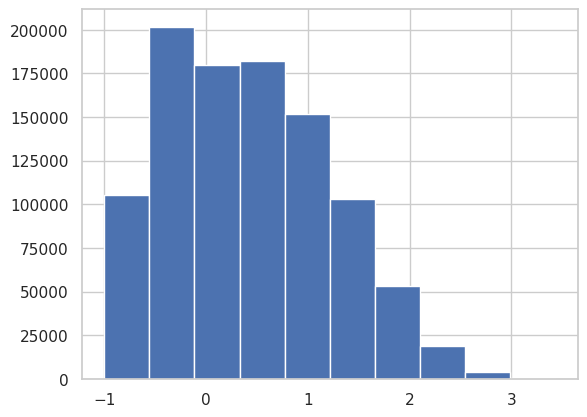

In [12]:
plt.hist(x_test_final1[:,0]-x_test_final[:,0])

(array([   630.,  10206.,  44370., 103269., 156741., 179237., 191638.,
        222458.,  87101.,   4350.]),
 array([229.47689676, 251.54206971, 273.60724265, 295.6724156 ,
        317.73758855, 339.80276149, 361.86793444, 383.93310739,
        405.99828033, 428.06345328, 450.12862623]),
 <BarContainer object of 10 artists>)

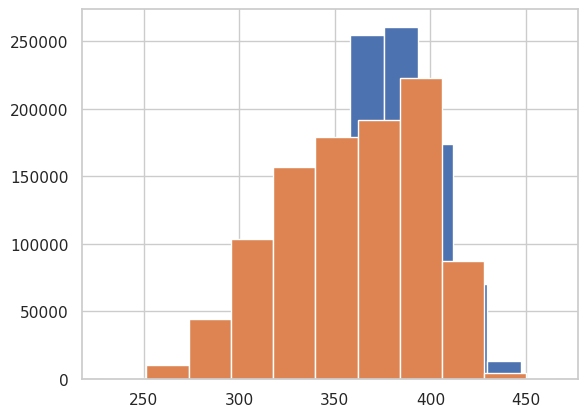

In [13]:
plt.hist(y)
plt.hist(y1)

In [14]:
for j in range(3):
    LL=True
    for k in range(len(L_conditions)):
        LL=np.logical_and(LL,L_conditions[k][j])
        LL=L_conditions[k][j]
        print(which_data_list[k],np.sum(LL)/10000)

Austensite 30.7116
Bainite_start 27.2221
Martensite_start 41.8471
Bainite 0.7031
Martensite_start_RA 0.0
Ferrite_critCR 0.0
Austensite 30.7116
Bainite_start 49.0411
Martensite_start 63.7559
Bainite 59.5979
Martensite_start_RA 0.0
Ferrite_critCR 1.9839
Austensite 30.7116
Bainite_start 70.5066
Martensite_start 85.4386
Bainite 95.2628
Martensite_start_RA 0.0
Ferrite_critCR 57.6697


In [15]:

dat=[data[:,k] for k in range(7)]
dat.append(np.sum(data,axis=1))

li=['C', 'Si', 'Mn', 'Cr', 'Al', 'Mo', 'V', 'w_per']
fig1,ax1=plt.subplots(2,4,figsize=(10,5))
ax1=ax1.flatten()
for k in range(8):

    H,bins =np.histogram(dat[k],bins=nbins)
    H1,_ =np.histogram(dat[k][L.flatten()],bins=nbins)

    HH=H1/H

    ax1[k].bar(bins[:-1],HH,width=bins[1]-bins[0])
    ax1[k].set_ylim([0,1])
    ax1[k].set_title(li[k])
    

fig1.tight_layout()


NameError: name 'data' is not defined

In [ ]:
axs=[]
fig, ax= plt.subplots(8,8,figsize=(10,10))
#fig.subplots_adjust(wspace=3, hspace=3)
for k in range(8):
    for j in range(8): 
        ax[k,j].grid(False) 
        
        if k>j:
            
            H, yedges, xedges =np.histogram2d(dat[k],dat[j],bins=nbins)
            H1, _, _ =np.histogram2d(dat[k][L.flatten()],dat[j][L.flatten()],bins=nbins)

            HH=H1/H
            im=ax[k,j].pcolormesh(xedges, yedges, HH,cmap='jet_r',norm=norm)
            ax[k,j].set_aspect('auto')
            #fig.colorbar(cf, ax=ax[k,j])
            axs.append(ax[k,j])

            if k!=7:
                ax[k,j].set_xticklabels([])

            if j!=0:
                ax[k,j].set_yticklabels([])


            if k==7:
                ax[k,j].set_xlabel(li[j])

            if j==0:
                ax[k,j].set_ylabel(li[k])
 




        else:
            ax[k,j].remove()


cbar=fig.colorbar(im,ax=axs, orientation='vertical',fraction=0.03)

cbar.set_label('Acception Percentage')

plt.savefig('final_prediction.png', dpi=300, bbox_inches='tight')
# fig.tight_layout()